In [2]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [3]:
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2021, 12, 31)

amd = data.DataReader("AMD", start=start_date, end=end_date, data_source="yahoo")

amd.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,11.65,11.02,11.42,11.43,55182000,11.43
2017-01-04,11.52,11.24,11.45,11.43,40781200,11.43
2017-01-05,11.69,11.23,11.43,11.24,38855200,11.24
2017-01-06,11.49,11.11,11.29,11.32,34453500,11.32
2017-01-09,11.64,11.31,11.37,11.49,37304800,11.49


In [12]:
df = pd.concat([amd["Adj Close"]], axis=1)
# print(df.head())
help(df.rolling)

Help on method rolling in module pandas.core.generic:

rolling(window: 'int | timedelta | BaseOffset | BaseIndexer', min_periods: 'int | None' = None, center: 'bool_t' = False, win_type: 'str | None' = None, on: 'str | None' = None, axis: 'Axis' = 0, closed: 'str | None' = None, method: 'str' = 'single') method of pandas.core.frame.DataFrame instance
    Provide rolling window calculations.
    
    Parameters
    ----------
    window : int, offset, or BaseIndexer subclass
        Size of the moving window. This is the number of observations used for
        calculating the statistic. Each window will be a fixed size.
    
        If its an offset then this will be the time period of each window. Each
        window will be a variable sized based on the observations included in
        the time-period. This is only valid for datetimelike indexes.
    
        If a BaseIndexer subclass is passed, calculates the window boundaries
        based on the defined ``get_window_bounds`` method

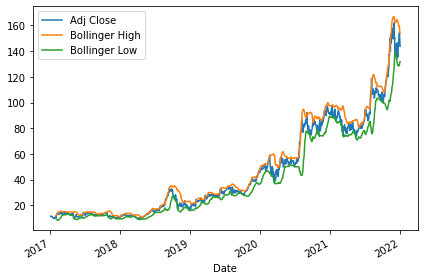

In [11]:
# trading days in a month = 20 {5 days, 4 weeks}
window = 20
no_of_std = 2

rolling_mean = df["Adj Close"].rolling(window).mean()
rolling_std = df["Adj Close"].rolling(window).std()

df["Mid"] = rolling_mean
df["Bollinger High"] = rolling_mean + (rolling_std * no_of_std)
df["Bollinger Low"] = rolling_mean - (rolling_std * no_of_std)

# df.tail()

df[["Adj Close", "Bollinger High", "Bollinger Low"]].plot()

plt.tight_layout()
plt.show()